In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [19]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [23]:
train_data.shape

(60000, 28, 28)

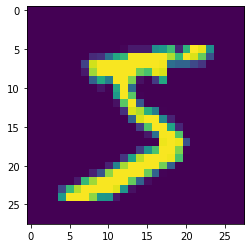

In [25]:
plt.imshow(train_data[0])

In [26]:
train_labels[0]

5

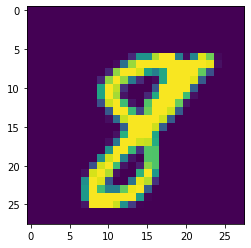

In [27]:
plt.imshow(train_data[55])

In [28]:
train_labels[55]


8

In [30]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [35]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [36]:
train_labels[0]

5

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.2578 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9891


In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0624 - accuracy: 0.9814


[0.062406208366155624, 0.9814000129699707]